# Исследование по управлению рисками и принятию решения о покупке коров в молочное хозяйство

**Описание проекта:**\
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».\
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!\
Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:\
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);\
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

**Цель проекта:**\
Отобрать коров по двум критериям:\
средний удой за год — не менее 6000 килограммов;\
молоко должно быть вкусным.

**Описание данных:**\
3 датасета:\
ferma_main.csv\
ferma_dad.csv\
cow_buy.csv

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:\
id — уникальный идентификатор коровы.\
Удой, кг — масса молока, которую корова даёт в год (в килограммах).\
ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.\
Сырой протеин, г — содержание сырого протеина в корме (в граммах).\
СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.\
Порода — порода коровы.\
Тип пастбища — ландшафт лугов, на которых паслась корова.\
порода папы_быка — порода папы коровы.\
Жирность,% — содержание жиров в молоке (в процентах).\
Белок,% — содержание белков в молоке (в процентах).\
Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).\
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).\
Признаки в датасете ferma_main.csv можно разделить на группы.\
Характеристики коровы: id, Порода, порода папы_быка, Возраст.\
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г,\
СПО (Сахаро-протеиновое соотношение).\
Характеристика пастбища: Тип пастбища.\
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.\
Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:\
id — уникальный идентификатор коровы.\
Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:\
Порода — порода коровы.\
Тип пастбища — ландшафт лугов, на которых паслась корова.\
порода папы_быка — порода папы коровы.\
Имя_папы — имя папы коровы.\
Текущая_жирность,% — содержание жиров в молоке (в процентах).\
Текущий_уровень_белок,% — содержание белков в молоке (в процентах).\
Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.\
Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.\
Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.\
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

**План исследования:**
1. Загрузка и изучение данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Корреляционный анализ признаков в датасете.
5. Задача регрессии.
6. Задача классификации.
7. Итоговые выводы.

## 1. Загрузка данных

In [1]:
!pip install phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy import stats as st
from sklearn.metrics import r2_score, mean_squared_error,\
     mean_absolute_error, accuracy_score, recall_score,\
     precision_score, confusion_matrix, precision_recall_curve 

1.1 Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы.

In [2]:
try:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')
except:
    ferma_main = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep=';')
    ferma_dad = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep=';')
    cow_buy = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep=';')

1.2 Выводим первые строки датафеймов. Изучаем общую информацию о датафреймах.

In [3]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Выводим основную информацию о датафреймах:

In [6]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [7]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Проверяем наличие пропущенных значений в датафреймах:

In [9]:
ferma_main.isna().sum()

id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

In [10]:
ferma_dad.isna().sum()

id          0
Имя Папы    0
dtype: int64

In [11]:
cow_buy.isna().sum()

Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

**Вывод:**\
В датафрейме ferma_main 634 записи, в датафрейме ferma_dad 629 записей, в датафрейме cow_buy 20 записей.\
Пропусков в данных нет.\
Названия столбцов являются некорректными, их необходимо будет привести к нижнему регистру.\
Типы данных в датафреймe ferma_main в столбцах эке (энергетическая кормовая единица), сырой протеин, г, жирность,%, белок,% и в датафрейме cow_buy в столбцах текущая_жирность,%, текущий_уровень_белок,% не соответствуют содержащимся в них данным.

##  2. Предобработка данных

2.1 Приведение к нижнему регистру названий столбцов, изменение названий:

In [12]:
ferma_main.columns = ferma_main.columns.str.lower()

In [13]:
ferma_main = ferma_main.rename(columns={\
    'удой, кг': 'удой(кг)',\
    'эке (энергетическая кормовая единица)': 'эке',\
    'сырой протеин, г': 'сырой протеин(г)',\
    'спо (сахаро-протеиновое соотношение)': 'спо',\
    'жирность,%': 'жирность(%)',\
    'белок,%': 'белок(%)',\
    'порода папы_быка': 'порода папы'})

In [14]:
ferma_dad.columns = ferma_dad.columns.str.lower()

In [15]:
cow_buy.columns = cow_buy.columns.str.lower()

In [16]:
cow_buy = cow_buy.rename(columns={\
    'текущая_жирность,%': 'текущая жирность(%)',\
    'текущий_уровень_белок,%': 'текущий белок(%)',\
    'имя_папы': 'имя папы',\
    'порода папы_быка': 'порода папы'})

Проверяем названия столбцов:

In [17]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой(кг)          634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой протеин(г)  634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип пастбища      634 non-null    object
 7   порода папы       634 non-null    object
 8   жирность(%)       634 non-null    object
 9   белок(%)          634 non-null    object
 10  вкус молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [18]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [19]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   порода               20 non-null     object
 1   тип пастбища         20 non-null     object
 2   порода папы          20 non-null     object
 3   имя папы             20 non-null     object
 4   текущая жирность(%)  20 non-null     object
 5   текущий белок(%)     20 non-null     object
 6   возраст              20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


2.2 Обработка дубликатов

Проверка на наличие явных дубликатов:

In [20]:
ferma_main.duplicated().sum()

5

In [21]:
ferma_dad.duplicated().sum()

0

In [22]:
cow_buy.duplicated().sum()

4

Удаляем явные дубликаты:

In [23]:
ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)

In [24]:
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

Проверка на отсутствие явных дубликатов:

In [25]:
ferma_main.duplicated().sum()

0

In [26]:
cow_buy.duplicated().sum()

0

Проверка на наличие неявных дубликатов:

In [27]:
ferma_main['тип пастбища'].value_counts()

Холмистое    351
Равнинное    253
Равнинные     25
Name: тип пастбища, dtype: int64

In [28]:
cow_buy['тип пастбища'].value_counts()

равнинное    8
холмистое    8
Name: тип пастбища, dtype: int64

Приведем к нижнему регистру типы пастбища, заменим "равнинные" на "равнинное":

In [29]:
ferma_main['тип пастбища'] = ferma_main['тип пастбища'].str.lower()\
                                                       .replace('равнинные', 'равнинное')

In [30]:
ferma_main['тип пастбища'].value_counts()

холмистое    351
равнинное    278
Name: тип пастбища, dtype: int64

In [31]:
ferma_main['порода'].value_counts()

Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: порода, dtype: int64

In [32]:
ferma_main['порода папы'].value_counts()

Соверин    311
Айдиал     240
Айдиалл     78
Name: порода папы, dtype: int64

In [33]:
cow_buy['порода'].value_counts()

Вис Бик Айдиал     8
РефлешнСоверинг    8
Name: порода, dtype: int64

In [34]:
cow_buy['порода папы'].value_counts()

Соверин    10
Айдиал      6
Name: порода папы, dtype: int64

Заменим породы на 'Айдиал', 'Соверинг':

In [35]:
ferma_main['порода'] = ferma_main['порода'].replace('Вис Бик Айдиал', 'Айдиал')
ferma_main['порода'] = ferma_main['порода'].replace('РефлешнСоверинг', 'Соверинг')
ferma_main['порода папы'] = ferma_main['порода папы'].replace('Соверин', 'Соверинг')
ferma_main['порода папы'] = ferma_main['порода папы'].replace('Айдиалл', 'Айдиал')
cow_buy['порода'] = cow_buy['порода'].replace('Вис Бик Айдиал', 'Айдиал')
cow_buy['порода'] = cow_buy['порода'].replace('РефлешнСоверинг', 'Соверинг')
cow_buy['порода папы'] = cow_buy['порода папы'].replace('Соверин', 'Соверинг')

In [36]:
ferma_main['порода'].value_counts()

Айдиал      373
Соверинг    256
Name: порода, dtype: int64

In [37]:
ferma_main['порода папы'].value_counts()

Айдиал      318
Соверинг    311
Name: порода папы, dtype: int64

In [38]:
cow_buy['порода'].value_counts()

Айдиал      8
Соверинг    8
Name: порода, dtype: int64

In [39]:
cow_buy['порода папы'].value_counts()

Соверинг    10
Айдиал       6
Name: порода папы, dtype: int64

2.3 Изменение типов данных

Изменение типов данных в датафреймах ferma_main и cow_buy:

In [40]:
wrong_type_cols = ['эке', 'спо', 'жирность(%)', 'белок(%)']
for col in wrong_type_cols:
    ferma_main[col] = ferma_main[col].replace(to_replace = ',', value = '.', regex = True)
    ferma_main[col] = ferma_main[col].astype('float')

In [41]:
wrong_type_cols = ['текущая жирность(%)', 'текущий белок(%)']
for col in wrong_type_cols:
    cow_buy[col] = cow_buy[col].replace(to_replace = ',', value = '.', regex = True)
    cow_buy[col] = cow_buy[col].astype('float')

Проверяем типы данных:

In [42]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой(кг)          629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой протеин(г)  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип пастбища      629 non-null    object 
 7   порода папы       629 non-null    object 
 8   жирность(%)       629 non-null    float64
 9   белок(%)          629 non-null    float64
 10  вкус молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [43]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   порода               16 non-null     object 
 1   тип пастбища         16 non-null     object 
 2   порода папы          16 non-null     object 
 3   имя папы             16 non-null     object 
 4   текущая жирность(%)  16 non-null     float64
 5   текущий белок(%)     16 non-null     float64
 6   возраст              16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


**Вывод:**
1. Привели к нижнему регистру названия столбцов, измененили названия где требуется.
2. Удалили 5 явных дубликатов в датафрейме ferma_main, 4 явных дубликата в датафрейме cow_buy, устранили неявные дубликаты. 
3. Изменили типы данных в датафрейме ferma_main в столбцах эке, спо, жирность(%), белок(%) и в датафрейме cow_buy в столбцах текущая жирность(%), текущий белок(%) на число с плавающей точкой (float).

## 3. Исследовательский анализ данных

Просмотрим описание датафрейма ferma_main:

In [44]:
ferma_main.describe()

,id,удой(кг),эке,сырой протеин(г),спо,жирность(%),белок(%)
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


Просмотрим описание датафрейма cow_buy:

In [45]:
cow_buy.describe()

,текущая жирность(%),текущий белок(%)
count,16.000000,16.000000
mean,3.571875,3.068250
std,0.141620,0.011264
min,3.340000,3.046000
25%,3.415000,3.059500
50%,3.585000,3.073500
75%,3.692500,3.076750
max,3.770000,3.081000


3.1 Количественные признаки

Количественные признаки в датафрейме ferma_main

Признак 'удой'

Строим графики:

In [46]:
ferma_main['удой(кг)'].sort_values(ascending=False).head()

16     45616
70      7222
135     7207
296     7201
294     7197
Name: удой(кг), dtype: int64

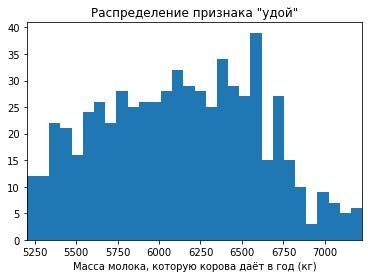

In [47]:
plt.hist(ferma_main['удой(кг)'], bins=600)
plt.xlim(5204, 7222)
plt.title('Распределение признака "удой"')
plt.xlabel('Масса молока, которую корова даёт в год (кг)')
plt.show()

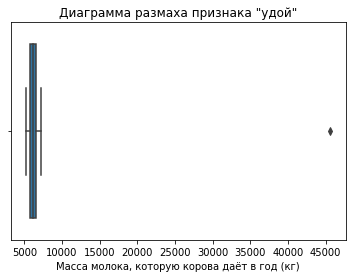

In [48]:
sns.boxplot(x=ferma_main['удой(кг)']);
plt.title('Диаграмма размаха признака "удой"');
plt.xlabel('Масса молока, которую корова даёт в год (кг)');
plt.show()

Удаляем аномальное значение, оно же максимальное значение при просмотре описания датафрейма:

In [49]:
ferma_main = ferma_main[ferma_main['удой(кг)'] != 45616]

Проверяем удаление:

In [50]:
ferma_main['удой(кг)'].sort_values(ascending=False).head()

70     7222
135    7207
296    7201
294    7197
593    7174
Name: удой(кг), dtype: int64

**Промежуточный вывод:**\
Удалили аномальное значение, в остальном, как видно из графиков, выбросов нет, распределение признака "удой" выглядит нормальным.

Признак 'эке'

Строим графики:

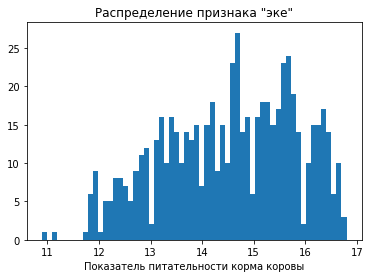

In [51]:
plt.hist(ferma_main['эке'], bins=60)
plt.title('Распределение признака "эке"')
plt.xlabel('Показатель питательности корма коровы')
plt.show()

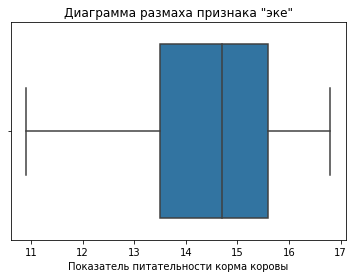

In [52]:
sns.boxplot(x=ferma_main['эке']);
plt.title('Диаграмма размаха признака "эке"');
plt.xlabel('Показатель питательности корма коровы');
plt.show()

**Промежуточный вывод:**\
На графике распределения признака 'эке' наблюдаются два пика на значениях примерно 14,7 и 15,7.\
Аномальных значений и выбросов не наблюдается.

Признак 'сырой протеин(г)'

Строим графики:

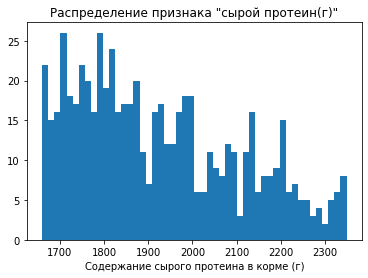

In [53]:
plt.hist(ferma_main['сырой протеин(г)'], bins=50)
plt.title('Распределение признака "сырой протеин(г)"')
plt.xlabel('Содержание сырого протеина в корме (г)')
plt.show()

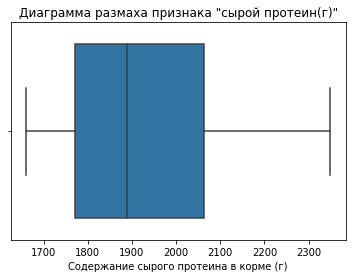

In [54]:
sns.boxplot(x=ferma_main['сырой протеин(г)']);
plt.title('Диаграмма размаха признака "сырой протеин(г)"');
plt.xlabel('Содержание сырого протеина в корме (г)');
plt.show()

**Промежуточный вывод:**\
Распределение признака 'сырой протеин(г)' выглядит нормальным.\
Аномалий и выбросов не наблюдается.

Признак 'спо'

Строим графики:

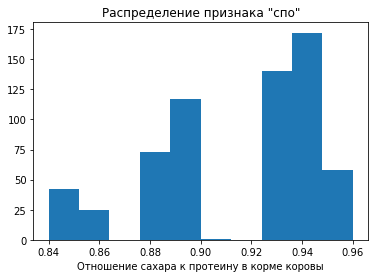

In [55]:
plt.hist(ferma_main['спо'], bins=10)
plt.title('Распределение признака "спо"')
plt.xlabel('Отношение сахара к протеину в корме коровы')
plt.show()

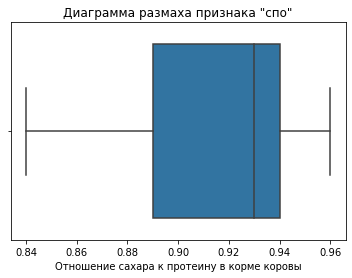

In [56]:
sns.boxplot(x=ferma_main['спо']);
plt.title('Диаграмма размаха признака "спо"');
plt.xlabel('Отношение сахара к протеину в корме коровы');
plt.show()

**Промежуточный вывод:**\
Как видно из графика распределения признака 'спо', наблюдается пик на значении 0,94. Распределение не выглядит нормальным, возможно, из-за специфичности признака.\
Аномалий и выбросов не наблюдается.

Признак 'жирность(%)'

Строим графики:

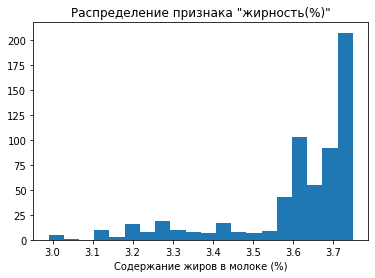

In [57]:
plt.hist(ferma_main['жирность(%)'], bins=20)
plt.title('Распределение признака "жирность(%)"')
plt.xlabel('Содержание жиров в молоке (%)')
plt.show()

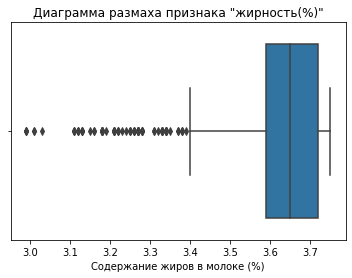

In [58]:
sns.boxplot(x=ferma_main['жирность(%)']);
plt.title('Диаграмма размаха признака "жирность(%)"');
plt.xlabel('Содержание жиров в молоке (%)');
plt.show()

Доля выбросов по отношению ко всему датафрейму:

In [59]:
round(len(ferma_main[ferma_main['жирность(%)'] < 3.4]) / len(ferma_main) * 100, 2)

13.69

**Промежуточный вывод:**\
Как видно из графиков, наблюдаются выбросы в промежутке до значения 3,4%. Доля таких выбросов составляет 13,69%. Удаление выбросов, доля которых составляет более 10%, может привести к искажению данных. Поэтому оставляем все данные, выбросы не удаляем.

Признак 'белок(%)'

Строим графики:

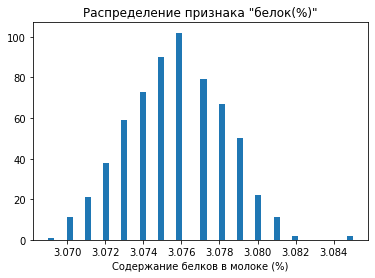

In [60]:
plt.hist(ferma_main['белок(%)'], bins=50)
plt.title('Распределение признака "белок(%)"')
plt.xlabel('Содержание белков в молоке (%)')
plt.show()

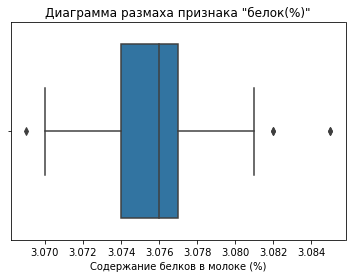

In [61]:
sns.boxplot(x=ferma_main['белок(%)']);
plt.title('Диаграмма размаха признака "белок(%)"');
plt.xlabel('Содержание белков в молоке (%)');
plt.show()

Удаляем выбросы < 3.069 и > 3.081:

In [62]:
ferma_main = ferma_main[(ferma_main['белок(%)'] > 3.069) &\
                        (ferma_main['белок(%)'] < 3.081)]

**Промежуточный вывод:**\
Наблюдаются выбросы на промежутке < 3.069 и > 3.081, удаляем их.\
Распределение признака 'белок(%)' нормальное.

Количественные признаки в датафрейме cow_buy

Признак 'текущая жирность(%)'

Строим графики:

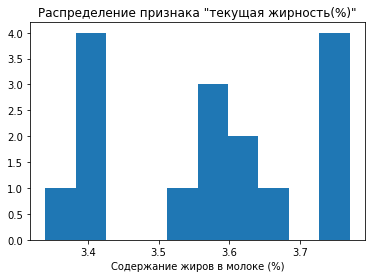

In [63]:
plt.hist(cow_buy['текущая жирность(%)'], bins=10)
plt.title('Распределение признака "текущая жирность(%)"')
plt.xlabel('Содержание жиров в молоке (%)')
plt.show()

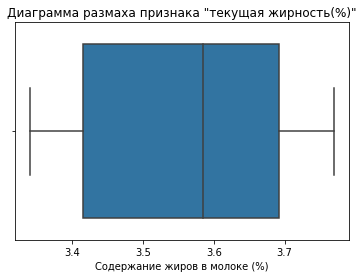

In [64]:
sns.boxplot(x=cow_buy['текущая жирность(%)']);
plt.title('Диаграмма размаха признака "текущая жирность(%)"');
plt.xlabel('Содержание жиров в молоке (%)');
plt.show()

**Промежуточный вывод:**\
Для оценки распределения недостаточно данных.\
Аномалий и выбросов не наблюдается.

Признак 'текущий белок(%)'

Строим графики:

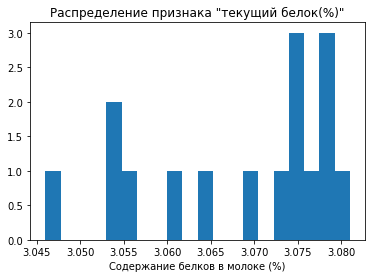

In [65]:
plt.hist(cow_buy['текущий белок(%)'], bins=20)
plt.title('Распределение признака "текущий белок(%)"')
plt.xlabel('Содержание белков в молоке (%)')
plt.show()

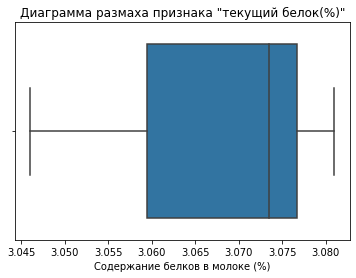

In [66]:
sns.boxplot(x=cow_buy['текущий белок(%)']);
plt.title('Диаграмма размаха признака "текущий белок(%)"');
plt.xlabel('Содержание белков в молоке (%)');
plt.show()

**Промежуточный вывод:**\
Для оценки распределения недостаточно данных.\
Аномалий и выбросов не наблюдается.

3.2 Категориальные признаки

Категориальные признаки в датафрейме ferma_main

Выведем для удобства первые строки датафрейма:

In [67]:
ferma_main.head()

,id,удой(кг),эке,сырой протеин(г),спо,порода,тип пастбища,порода папы,жирность(%),белок(%),вкус молока,возраст
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет


Признак 'порода'

Строим диграмму:

In [68]:
ferma_main['порода'].value_counts()

Айдиал      358
Соверинг    254
Name: порода, dtype: int64

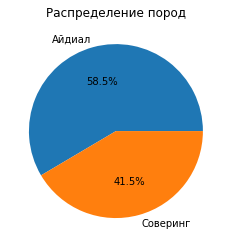

In [69]:
plt.pie(ferma_main['порода'].value_counts(),\
        labels=['Айдиал', 'Соверинг'],\
        autopct='%1.1f%%')
plt.title('Распределение пород')
plt.show()

**Промежуточный вывод:**\
Распределение пород нормальное: Айдиал - 58,5%, Соверинг - 41,5%.

Признак 'тип пастбища'

Строим диграмму:

In [70]:
ferma_main['тип пастбища'].value_counts()

холмистое    341
равнинное    271
Name: тип пастбища, dtype: int64

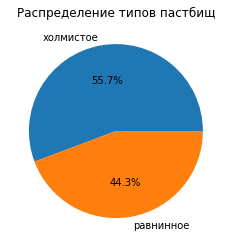

In [71]:
plt.pie(ferma_main['тип пастбища'].value_counts(),\
        labels=['холмистое', 'равнинное'],\
        autopct='%1.1f%%')
plt.title('Распределение типов пастбищ')
plt.show()

**Промежуточный вывод:**\
Распределение типов пастбищ нормальное: равнинное - 55,7%, холмистое - 44,3%.

Признак 'порода папы'

Строим диаграмму:

In [72]:
ferma_main['порода папы'].value_counts()

Айдиал      310
Соверинг    302
Name: порода папы, dtype: int64

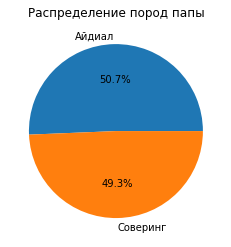

In [73]:
plt.pie(ferma_main['порода папы'].value_counts(),\
        labels=['Айдиал', 'Соверинг'],\
        autopct='%1.1f%%')
plt.title('Распределение пород папы')
plt.show()

**Промежуточный вывод:**\
Распределение пород папы нормальное: Айдиал - 50,7%, Соверинг - 49,3%.

Признак 'вкус молока'

Строим диаграмму:

In [74]:
ferma_main['вкус молока'].value_counts()

вкусно       357
не вкусно    255
Name: вкус молока, dtype: int64

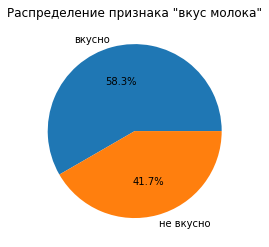

In [75]:
plt.pie(ferma_main['вкус молока'].value_counts(),\
        labels=['вкусно', 'не вкусно'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "вкус молока"')
plt.show()

**Промежуточный вывод:**\
Распределение признака 'вкус молока' нормальное: вкусно - 58,3%, не вкусно - 41,7%.

Признак 'возраст'

Строим диаграмму:

In [76]:
ferma_main['возраст'].value_counts()

более_2_лет    506
менее_2_лет    106
Name: возраст, dtype: int64

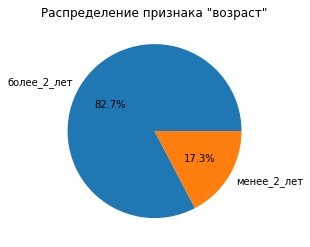

In [77]:
plt.pie(ferma_main['возраст'].value_counts(),\
        labels=['более_2_лет', 'менее_2_лет'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "возраст"')
plt.show()

**Промежуточный вывод:**\
Распределение признака 'возраст': более_2_лет - 82,7%, менее_2_лет - 17,3%. \
Это говорит о том, что среди коров на ферме преобладает возраст более 2-ух лет.

Категориальные признаки в датафрейме ferma_dad

Выведем для удобства первые строки датафрейма:

In [78]:
ferma_dad.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


Признак 'имя папы'

Строим диаграмму:

In [79]:
ferma_dad['имя папы'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя папы, dtype: int64

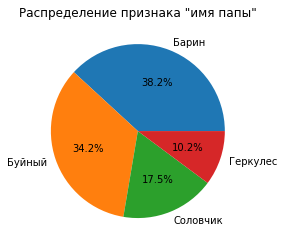

In [80]:
plt.pie(ferma_dad['имя папы'].value_counts(),\
        labels=['Барин', 'Буйный', 'Соловчик', 'Геркулес'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "имя папы"')
plt.show()

**Промежуточный вывод:**\
Распределение признака 'имя папы': Барин - 38,2%, Буйный - 34,2%, Соловчик - 17,5%, Геркулес - 10,2%.

Категориальные признаки в датафрейме cow_buy

Выведем для удобства первые строки датафрейма:

In [81]:
cow_buy.head()

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),текущий белок(%),возраст
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


Признак 'порода'

Строим диаграмму:

In [82]:
cow_buy['порода'].value_counts()

Айдиал      8
Соверинг    8
Name: порода, dtype: int64

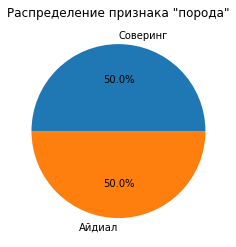

In [83]:
plt.pie(cow_buy['порода'].value_counts(),\
        labels=['Соверинг', 'Айдиал'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "порода"')
plt.show()

**Промежуточный вывод:**\
Распределение по признаку породы коровы 1:1: Соверинг - 50,0%, Айдиал - 50%.

Признак 'тип пастбища'

Строим диаграмму:

In [84]:
cow_buy['тип пастбища'].value_counts()

равнинное    8
холмистое    8
Name: тип пастбища, dtype: int64

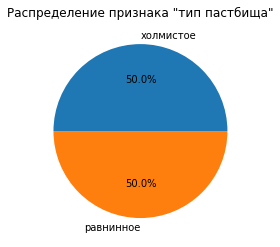

In [85]:
plt.pie(cow_buy['тип пастбища'].value_counts(),\
        labels=['холмистое', 'равнинное'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "тип пастбища"')
plt.show()

**Промежуточный вывод:**\
Распределение по ландшафту лугов, на которых паслась корова, 1:1: холмистое - 50%, равнинное - 50%.

Признак 'порода папы'

Строим диаграмму:

In [86]:
cow_buy['порода папы'].value_counts()

Соверинг    10
Айдиал       6
Name: порода папы, dtype: int64

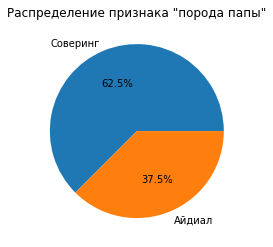

In [87]:
plt.pie(cow_buy['порода папы'].value_counts(),\
        labels=['Соверинг', 'Айдиал'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "порода папы"')
plt.show()

**Промежуточный вывод:**\
Распределение по породе папы коровы: Соверинг - 62,5%, Айдиал - 37,5%.

Признак 'имя папы' 

Строим диаграмму:

In [88]:
cow_buy['имя папы'].value_counts()

Буйный      7
Геркулес    5
Барин       2
Соловчик    2
Name: имя папы, dtype: int64

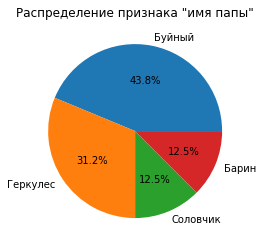

In [89]:
plt.pie(cow_buy['имя папы'].value_counts(),\
        labels=['Буйный', 'Геркулес', 'Соловчик', 'Барин'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "имя папы"')
plt.show()

**Промежуточный вывод:**\
Распределение по имени папы коровы: Буйный - 43,8%, Геркулес - 31,2%, Соловчик - 12,5%, Барин - 12,5%.

Признак 'возраст'

Строим диаграмму:

In [90]:
cow_buy['возраст'].value_counts()

более_2_лет    11
менее_2_лет     5
Name: возраст, dtype: int64

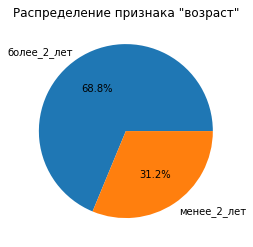

In [91]:
plt.pie(cow_buy['возраст'].value_counts(),\
        labels=['более_2_лет', 'менее_2_лет'],\
        autopct='%1.1f%%')
plt.title('Распределение признака "возраст"')
plt.show()

**Промежуточный вывод:**\
Распределение по возрасту коровы: более_2_лет - 68,8%, менее_2_лет - 31,2%.

**Вывод:**
1. Как показал иссследовательский анализ количественных признаков, почти все признаки распределены нормально.\
Удалили аномальное значение признака 'удой', равное 45 616 кг.
Удалили выбросы в признаке 'белок' на промежутке < 3.069% и > 3.081%. Тем самым улучшили данные.
2. Распределение категориальных признаков нормальное по всем признакам.

## 4. Корреляционный анализ

Расчет коэффициентов корреляции:

In [92]:
phik_matrix = ferma_main.drop('id', axis=1).phik_matrix()

interval columns not set, guessing: ['удой(кг)', 'эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']


Визуализация корреляционной матрицы:

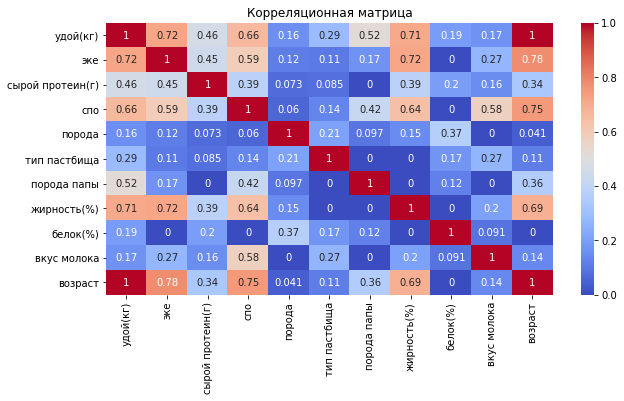

In [93]:
plt.figure(figsize=(10, 5))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Построение диаграмм рассеяния 

Построим диаграммы рассеяния для признака 'удой' и всех количественных признаков с учетом значения категориального признака 'порода':

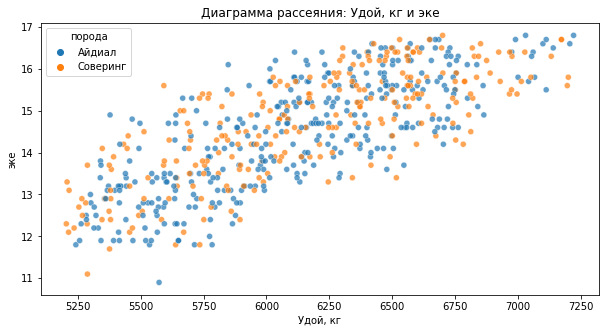

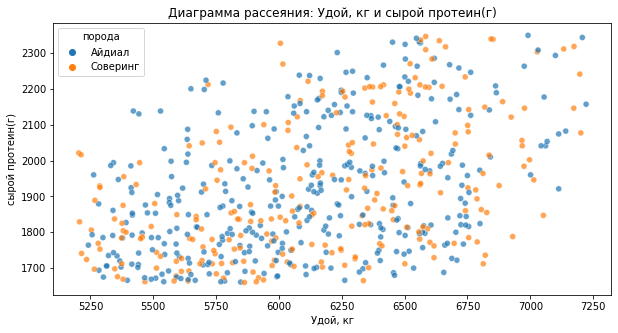

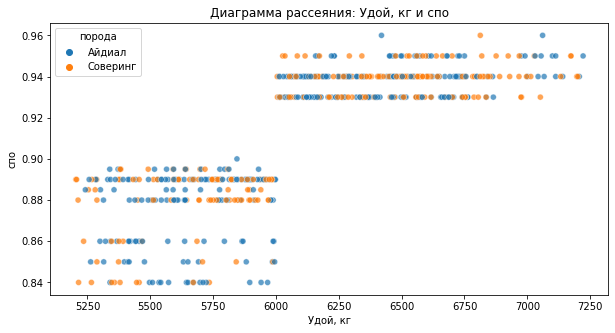

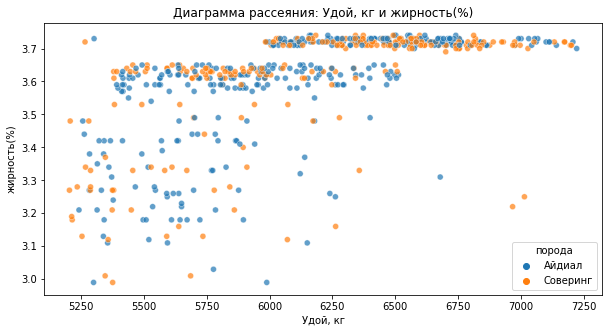

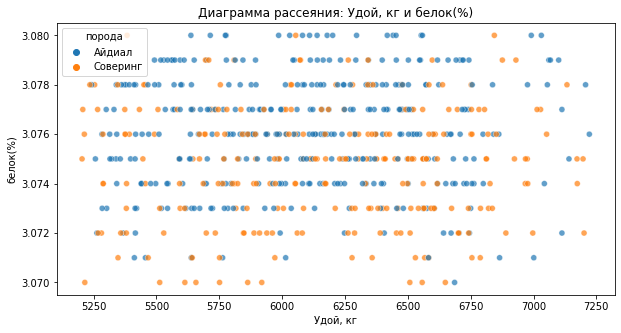

In [94]:
# создаем список количественных признаков:
quantitative_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# строим диаграммы рассеяния:
for feature in quantitative_features:  
    plt.figure(figsize=(10, 5))  
    sns.scatterplot(data=ferma_main, x='удой(кг)', y=feature, hue='порода', alpha=0.7)  
    plt.title(f'Диаграмма рассеяния: Удой, кг и {feature}')  
    plt.xlabel('Удой, кг')  
    plt.ylabel(feature)  
    plt.show() 

Построим диаграммы рассеяния для признака 'удой' и всех количественных признаков с учетом значения категориального признака 'вкус молока':

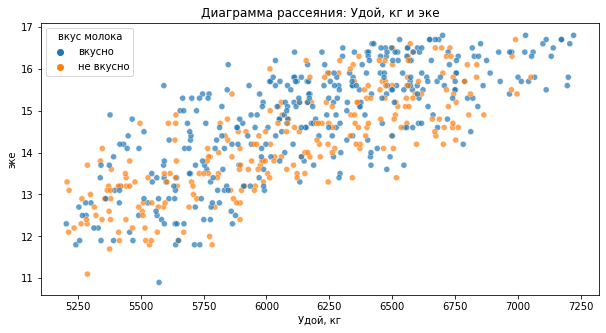

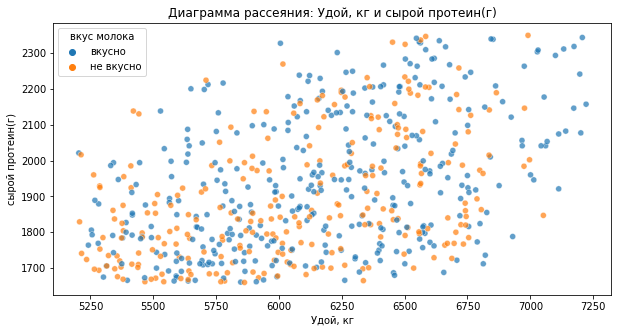

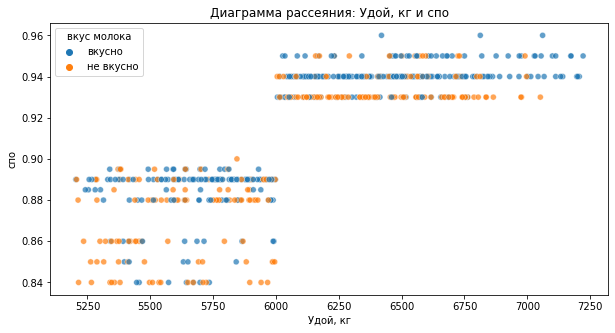

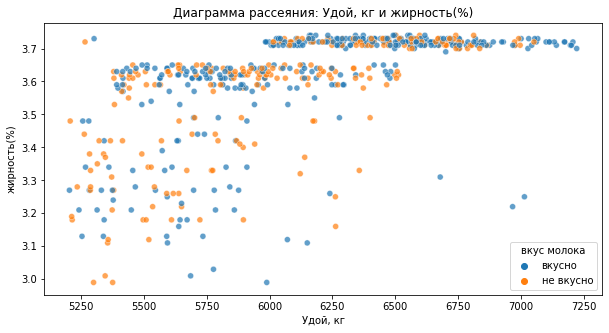

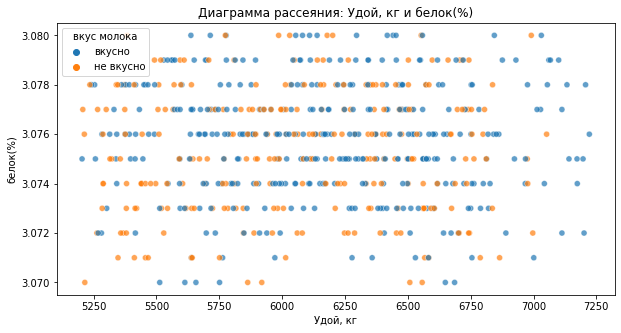

In [95]:
# создаем список количественных признаков:
quantitative_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# строим диаграммы рассеяния:
for feature in quantitative_features:  
    plt.figure(figsize=(10, 5))  
    sns.scatterplot(data=ferma_main, x='удой(кг)', y=feature, hue='вкус молока', alpha=0.7)  
    plt.title(f'Диаграмма рассеяния: Удой, кг и {feature}')  
    plt.xlabel('Удой, кг')  
    plt.ylabel(feature)  
    plt.show() 

Построим диаграммы рассеяния для признака 'удой' и всех количественных признаков с учетом значения категориального признака 'тип пастбища':

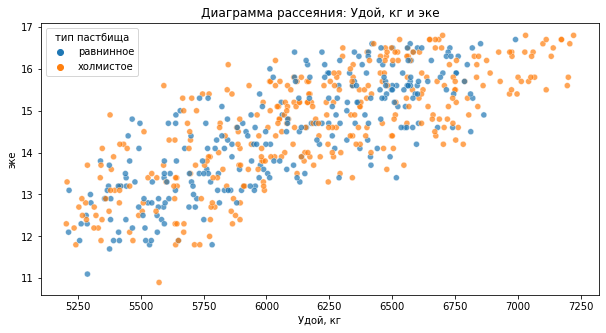

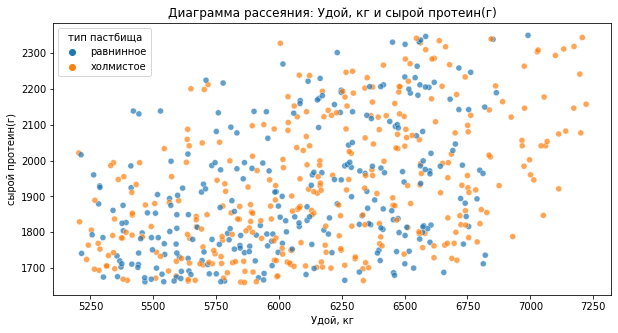

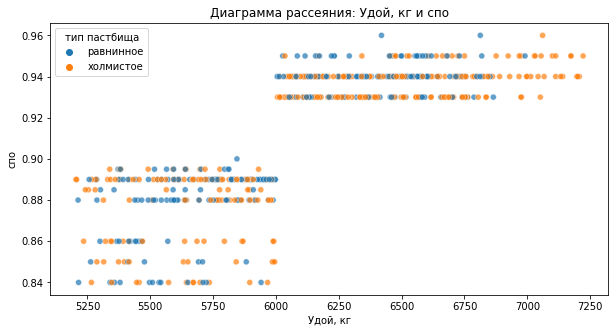

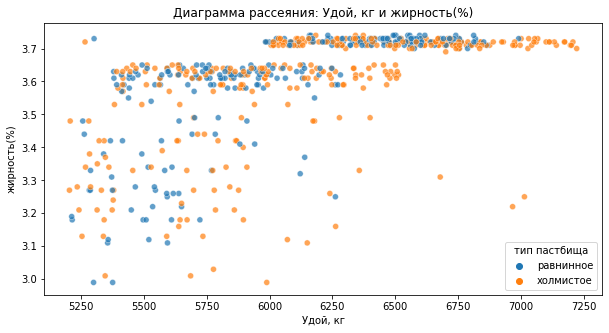

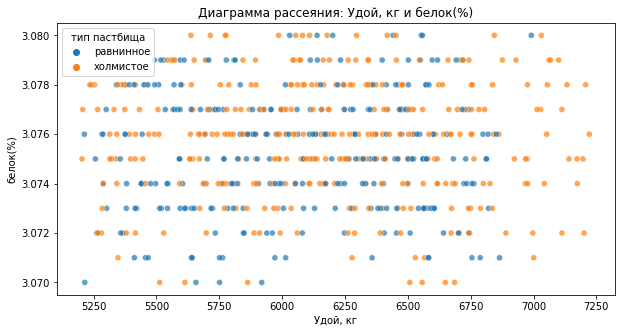

In [96]:
# создаем список количественных признаков:
quantitative_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# строим диаграммы рассеяния:
for feature in quantitative_features:  
    plt.figure(figsize=(10, 5))  
    sns.scatterplot(data=ferma_main, x='удой(кг)', y=feature, hue='тип пастбища', alpha=0.7)  
    plt.title(f'Диаграмма рассеяния: Удой, кг и {feature}')  
    plt.xlabel('Удой, кг')  
    plt.ylabel(feature)  
    plt.show() 

Построим диаграммы рассеяния для признака 'удой' и всех количественных признаков с учетом значения категориального признака 'порода папы':

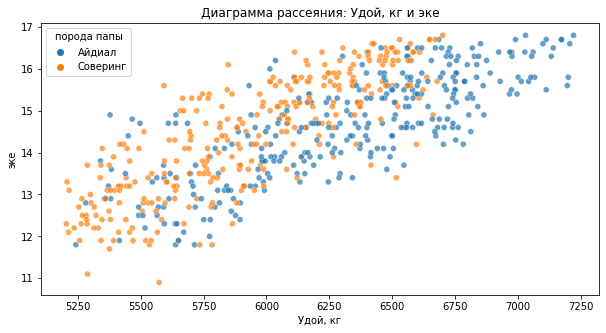

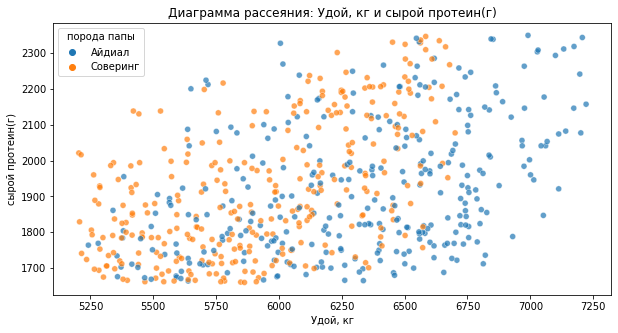

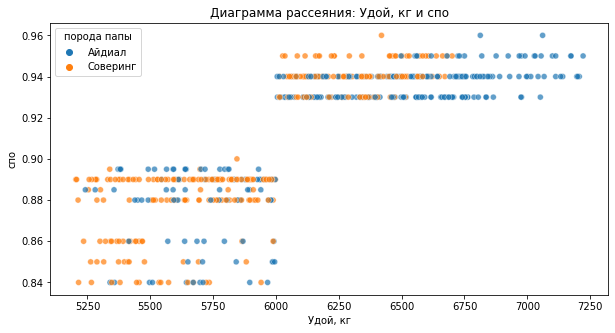

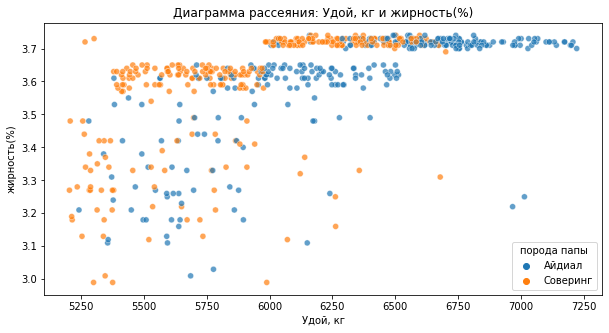

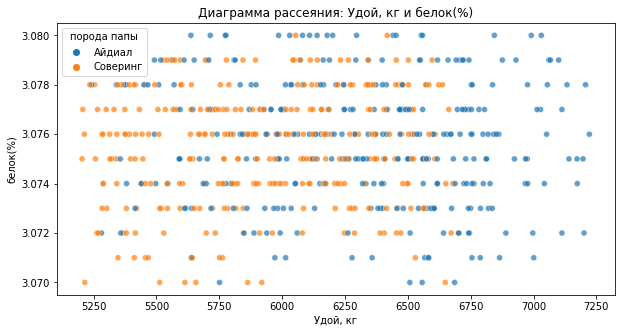

In [97]:
# создаем список количественных признаков:
quantitative_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# строим диаграммы рассеяния:
for feature in quantitative_features:  
    plt.figure(figsize=(10, 5))  
    sns.scatterplot(data=ferma_main, x='удой(кг)', y=feature, hue='порода папы', alpha=0.7)  
    plt.title(f'Диаграмма рассеяния: Удой, кг и {feature}')  
    plt.xlabel('Удой, кг')  
    plt.ylabel(feature)  
    plt.show() 

Построим диаграммы рассеяния для признака 'удой' и всех количественных признаков с учетом значения категориального признака 'возраст':

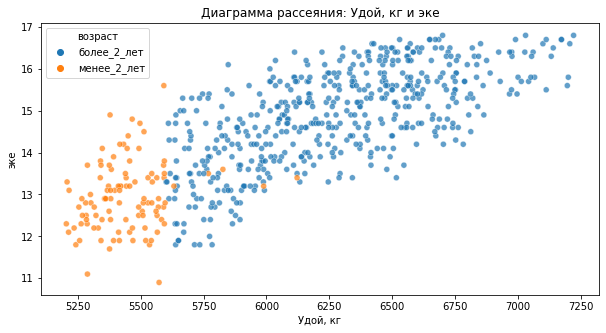

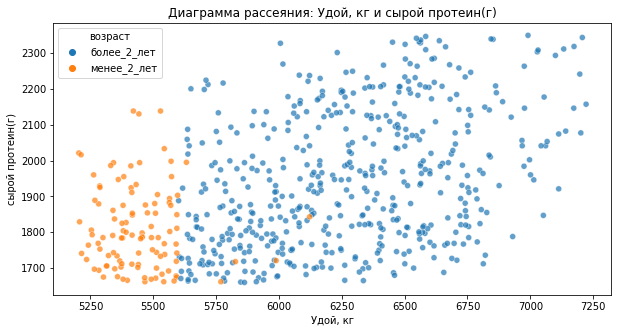

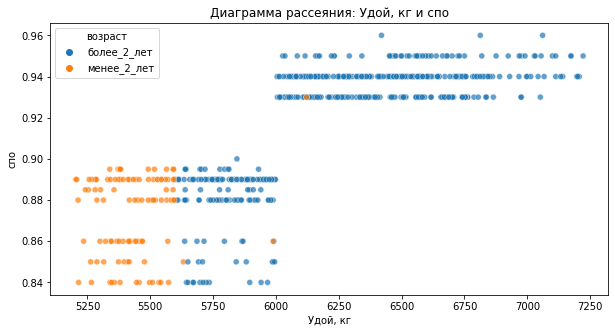

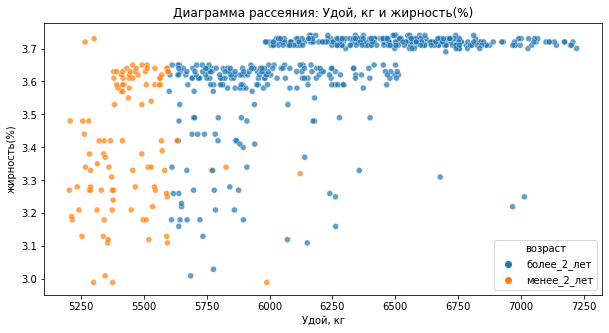

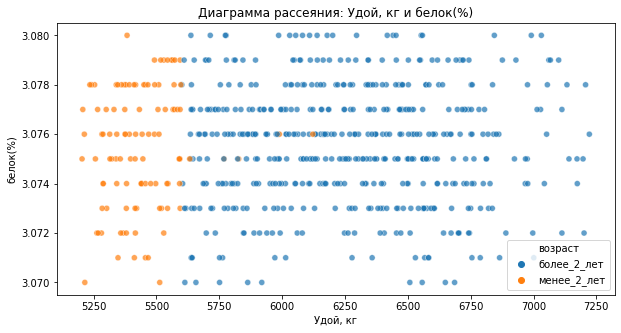

In [98]:
# создаем список количественных признаков:
quantitative_features = ['эке', 'сырой протеин(г)', 'спо', 'жирность(%)', 'белок(%)']

# строим диаграммы рассеяния:
for feature in quantitative_features:  
    plt.figure(figsize=(10, 5))  
    sns.scatterplot(data=ferma_main, x='удой(кг)', y=feature, hue='возраст', alpha=0.7)  
    plt.title(f'Диаграмма рассеяния: Удой, кг и {feature}')  
    plt.xlabel('Удой, кг')  
    plt.ylabel(feature)  
    plt.show() 

**Вывод:**
1. Между целевым признаком 'удой(кг)' и входным признаком 'сырой протеин'(г) наблюдается линейная связь.\
Между целевым признаком 'удой(кг)' и входными признаками 'эке', 'спо', 'жирность(%)', 'белок(%)' наблюдается нелинейная связь.\
Слабая корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'белок(%)' - 0,19, 'порода' - 0,16, 'тип пастбища' - 0,29.\
Умеренная корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'сырой протеин(г)' - 0,46, 'спо' - 0,66, 'порода папы' - 0,52.\
Высокая корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'эке' - 0,72, 'жирность(%)' - 0,71, 'возраст' - 1.\
Для категориального признака 'вкус молока' корреляцию не рассчитываем.
2. Между целевым и входными признаками есть нелинейные связи. Причиной этого может быть разный масштаб признаков. Дополнительные признаки предлагаю не вводить, а провести масштабирование или трансформирование признаков, при необходимости.
3. Как видно из корреляционной матрицы, между некоторыми входными признаками есть умеренная корреляция, но высокой корреляции, обычно указывающей на мультиколлинеарность, не наблюдается.

## 5. Обучение модели линейной регрессии

5.1 Модель №1

Целевой признак 'удой(кг)'.\
Отбор входных признаков:\
Убираем признак 'id', для обучения модели он не нужен.\
Можно убрать признак 'белок(%)', поскольку с ним связь целевого признака практически отсутствует (0,19) и является нелинейной.\
Признак 'жирность(%)' также убираем, он никак не влияет на удой молока.

In [99]:
ferma_ml_1 = ferma_main.drop(['id', 'белок(%)', 'жирность(%)'], axis=1)
ferma_ml_1.head()

,удой(кг),эке,сырой протеин(г),спо,порода,тип пастбища,порода папы,вкус молока,возраст
0,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,вкусно,более_2_лет
1,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет
2,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,не вкусно,более_2_лет
3,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,не вкусно,более_2_лет
4,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет


Разбиваем выборку:

In [100]:
RANDOM_STATE = 42

X = ferma_ml_1.drop('удой(кг)', axis=1)
y = ferma_ml_1['удой(кг)']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Список категориальных признаков:

In [101]:
cat_col_names = ['порода',\
                 'тип пастбища',\
                 'порода папы',\
                 'вкус молока',\
                 'возраст']

Список количественных признаков:

In [102]:
num_col_names = ['эке','сырой протеин(г)', 'спо']

Кодируем категориальные признаки с помощью OneHotEncoder

In [103]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [105]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [106]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Инициализация и обучение модели

In [107]:
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train, y_train)
predictions_1 = model_lr_1.predict(X_test)
r2_1 = r2_score(y_test, predictions_1)
print(f'R2 модели №1: {r2_1}')

R2 модели №1: 0.8034133611669033


Анализ остатков

Расчет остатков

In [108]:
residuals_1 = y_test - predictions_1

Построим графики по количественным признакам — гистограмму частотности распределения и диаграмму рассеяния

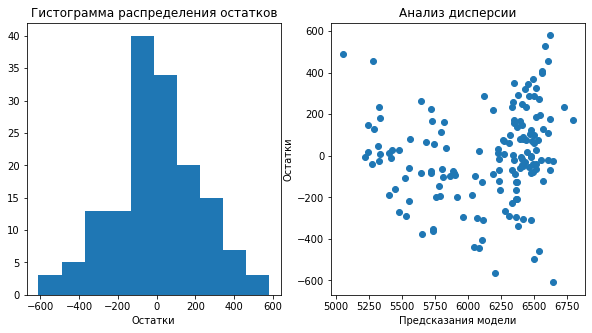

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_1, y=residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Промежуточный вывод:**\
Значение R2 модели - 0.8034133611669033.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым. 

5.2 Модель №2

Преобразуем признак 'спо' в категориальный признак

In [110]:
ferma_main['спо_кат'] = ferma_main['спо'].apply(lambda x: 1 if x > 0.91 else 0)

Преобразуем признак 'эке'

In [111]:
ferma_main['эке_2'] = ferma_main['эке'].apply(lambda x: x**2)

Целевой признак 'удой(кг)'.\
Отбор входных признаков:\
Убираем признаки 'id', 'белок(%)', 'жирность(%)', 'эке', 'спо', для обучения модели они не нужны.

In [112]:
ferma_ml_2 = ferma_main.drop(['id', 'белок(%)', 'жирность(%)', 'эке', 'спо'], axis=1)
ferma_ml_2.head()

,удой(кг),сырой протеин(г),порода,тип пастбища,порода папы,вкус молока,возраст,спо_кат,эке_2
0,5863,1743,Айдиал,равнинное,Айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет,0,163.84
2,5810,1854,Соверинг,холмистое,Соверинг,не вкусно,более_2_лет,0,196.00
3,5895,2012,Соверинг,холмистое,Айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет,0,163.84


Разбиваем выборку:

In [113]:
RANDOM_STATE = 42

X = ferma_ml_2.drop('удой(кг)', axis=1)
y = ferma_ml_2['удой(кг)']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Список категориальных признаков:

In [114]:
cat_col_names = ['порода',\
                 'тип пастбища',\
                 'порода папы',\
                 'вкус молока',\
                 'возраст']

Список количественных признаков:

In [115]:
num_col_names = ['эке_2','сырой протеин(г)', 'спо_кат']

Кодируем категориальные признаки с помощью OneHotEncoder

In [116]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [118]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [119]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Инициализация и обучение модели

In [120]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train, y_train)
predictions_2 = model_lr_2.predict(X_test)
r2_2 = r2_score(y_test, predictions_2)
print(f'R2 модели №2: {r2_2}')

R2 модели №2: 0.8332519251903154


Анализ остатков

Расчет остатков

In [121]:
residuals_2 = y_test - predictions_2

Построим графики по количественным признакам — гистограмму частотности распределения и диаграмму рассеяния

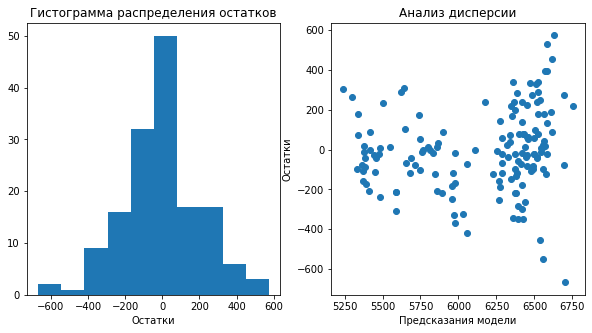

In [122]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Промежуточный вывод:**\
Значение R2 модели - 0.8332519251903154, что на 3% больше, чем в предыдущей модели.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым.\
Можно сделать вывод, что модель №2 более точная, т.е. уменьшение нелинейности между входным и целевыми признаками положительно влияет на модель.

5.3 Модель №3

Добавляем признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу id

In [123]:
ferma = ferma_main.merge(ferma_dad, on='id')
ferma.head()

,id,удой(кг),эке,сырой протеин(г),спо,порода,тип пастбища,порода папы,жирность(%),белок(%),вкус молока,возраст,спо_кат,эке_2,имя папы
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверинг,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверинг,холмистое,Соверинг,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверинг,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


Преобразуем признак 'спо' в категориальный признак

In [124]:
ferma['спо_кат'] = ferma['спо'].apply(lambda x: 1 if x > 0.91 else 0)

Преобразуем признак 'эке'

In [125]:
ferma['эке_2'] = ferma['эке'].apply(lambda x: x**2)

Целевой признак 'удой(кг)'.\
Отбор входных признаков:\
Убираем признаки 'id', 'белок(%)', 'жирность(%)', 'эке', 'спо', для обучения модели они не нужны.

In [126]:
ferma_ml_3 = ferma.drop(['id', 'белок(%)', 'жирность(%)', 'эке', 'спо'], axis=1)
ferma_ml_3.head()

,удой(кг),сырой протеин(г),порода,тип пастбища,порода папы,вкус молока,возраст,спо_кат,эке_2,имя папы
0,5863,1743,Айдиал,равнинное,Айдиал,вкусно,более_2_лет,0,201.64,Буйный
1,5529,2138,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет,0,163.84,Соловчик
2,5810,1854,Соверинг,холмистое,Соверинг,не вкусно,более_2_лет,0,196.00,Барин
3,5895,2012,Соверинг,холмистое,Айдиал,не вкусно,более_2_лет,0,153.76,Буйный
4,5302,1675,Айдиал,равнинное,Соверинг,вкусно,менее_2_лет,0,163.84,Барин


Разбиваем выборку:

In [127]:
RANDOM_STATE = 42

X = ferma_ml_3.drop('удой(кг)', axis=1)
y = ferma_ml_3['удой(кг)']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [128]:
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

Список категориальных признаков:

In [129]:
cat_col_names = ['порода',\
                 'тип пастбища',\
                 'порода папы',\
                 'вкус молока',\
                 'возраст',\
                 'имя папы']

Список количественных признаков:

In [130]:
num_col_names = ['эке_2','сырой протеин(г)', 'спо_кат']

Кодируем категориальные признаки с помощью OneHotEncoder

In [131]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [133]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [134]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Инициализация и обучение модели

In [135]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train, y_train)
predictions_3 = model_lr_3.predict(X_test)
r2_3 = r2_score(y_test, predictions_3)
print(f'R2 модели №3: {r2_3}')

R2 модели №3: 0.8467677260231983


Анализ остатков

Расчет остатков

In [136]:
residuals_3 = y_test - predictions_3

Построим графики по количественным признакам — гистограмму частотности распределения и диаграмму рассеяния

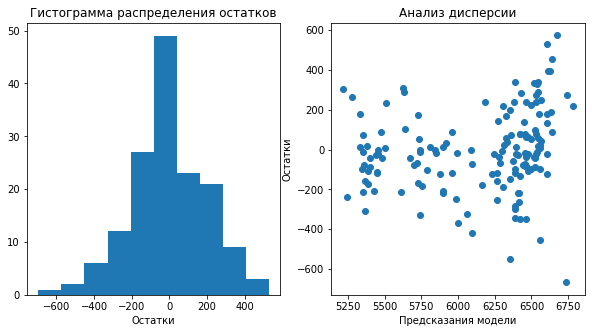

In [137]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals_3)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Промежуточный вывод:**\
Значение R2 модели - 0.8467677260231983, что еще больше, чем в предыдущих моделях.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии ошибок показал, что она стала более стабильной, чем в предыдущих моделях.\
Можно сделать вывод, что модель №3 оказалась более точной. Уменьшение нелинейности между входным и целевыми признаками и добавление нового входного признака положительно повлияло на модель.

5.4 Сравнение трех моделей линейной регрессии

Коэффициенты детерминации:

In [138]:
print(f'R2 модели №1: {r2_1}')

R2 модели №1: 0.8034133611669033


In [139]:
print(f'R2 модели №2: {r2_2}')

R2 модели №2: 0.8332519251903154


In [140]:
print(f'R2 модели №3: {r2_3}')

R2 модели №3: 0.8467677260231983


Остатки

Модель №1:\
Остатки имеют симметричное нормальное распределение.
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.

Модель №2:\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.

Модель №3:\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии ошибок показал, что эта модель более стабильная, чем предыдущие модели.

5.5 Оценка каждой модели по метрикам: MSE, MAE, RMSE 

MSE, MAE, RMSE модели №1:

In [141]:
mse_1 = mean_squared_error(y_test, predictions_1)
mae_1 = mean_absolute_error(y_test, predictions_1)
rmse_1 = mean_squared_error(y_test, predictions_1, squared=False)
print('MSE модели №1 = ', mse_1)
print('MAE модели №1 = ', mae_1)
print('RMSE модели №1 = ', rmse_1)

MSE модели №1 =  48710.034678146425
MAE модели №1 =  169.95056859919328
RMSE модели №1 =  220.70349946964237


MSE, MAE, RMSE модели №2:

In [142]:
mse_2 = mean_squared_error(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
print('MSE модели №2 = ', mse_2)
print('MAE модели №2 = ', mae_2)
print('RMSE модели №2 = ', rmse_2)

MSE модели №2 =  41316.666049668696
MAE модели №2 =  153.5116854564305
RMSE модели №2 =  203.2650143277704


MSE, MAE, RMSE модели №3:

In [143]:
mse_3 = mean_squared_error(y_test, predictions_3)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)
mae_3 = mean_absolute_error(y_test, predictions_3)
print('MSE модели №3 = ', mse_3)
print('MAE модели №3 = ', mae_3)
print('RMSE модели №3 = ', rmse_3)

MSE модели №3 =  37967.73485485037
MAE модели №3 =  146.4625952324208
RMSE модели №3 =  194.85311097041887


**Промежуточный вывод:**\
Наименьшие показатели ошибок у модели №3, поэтому эта модель будет самой точной и является лучшей.

Доверительный интервал прогноза лучшей модели:


In [144]:
confidence_interval = st.t.interval(  
    confidence=0.95,  
    df=len(predictions_3) - 1,  
    loc=np.mean(predictions_3),  
    scale=st.sem(predictions_3)  
) 
print(confidence_interval)

(6069.931182548928, 6212.072396197736)


**Промежуточный вывод:**\
Доверительный интервал прогноза лучшей модели - 6069.931182548928, 6212.072396197736

5.6 Прогнозирование удоя коров, которых фермер хочет купить

Добавление в датасет cow_buy.csv недостающих признаков  ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение): средних значений, увеличенных на 5%, из датасета ferma_main.csv

In [145]:
cow_buy['эке'] = ferma_main['эке'].mean() * 1.05
cow_buy['сырой протеин(г)'] = ferma_main['сырой протеин(г)'].mean() * 1.05
cow_buy['спо'] = ferma_main['спо'].mean() * 1.05

Преобразуем признак 'спо' в категориальный признак

In [146]:
cow_buy['спо_кат'] = cow_buy['спо'].apply(lambda x: 1 if x > 0.91 else 0)

Преобразуем признак 'эке'

In [147]:
cow_buy['эке_2'] = cow_buy['эке'].apply(lambda x: x**2)

Убираем признаки 'текущий белок(%)', 'эке', 'спо'

In [148]:
cow_buy_ml = cow_buy.drop(['текущий белок(%)', 'эке', 'спо'], axis=1)
cow_buy_ml.head()

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),возраст,сырой протеин(г),спо_кат,эке_2
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,более_2_лет,2018.417402,1,233.208082
1,Айдиал,равнинное,Соверинг,Буйный,3.54,менее_2_лет,2018.417402,1,233.208082
2,Соверинг,равнинное,Соверинг,Барин,3.59,более_2_лет,2018.417402,1,233.208082
3,Соверинг,холмистое,Айдиал,Буйный,3.40,более_2_лет,2018.417402,1,233.208082
4,Соверинг,равнинное,Айдиал,Буйный,3.64,более_2_лет,2018.417402,1,233.208082


Список категориальных признаков:

In [149]:
cat_col_names = ['порода',\
                 'тип пастбища',\
                 'порода папы',\
                  'имя папы',\
                 'возраст',\
                 'спо_кат']

Список количественных признаков:

In [150]:
num_col_names = ['сырой протеин(г)', 'спо_кат', 'эке_2']

Формируем полные тренировочные выборки:

In [151]:
X_train_full.head()

,сырой протеин(г),порода,тип пастбища,порода папы,вкус молока,возраст,спо_кат,эке_2,имя папы
0,1984,Айдиал,равнинное,Айдиал,не вкусно,более_2_лет,1,198.81,Буйный
1,1984,Айдиал,равнинное,Айдиал,вкусно,более_2_лет,1,246.49,Буйный
2,2067,Айдиал,холмистое,Айдиал,вкусно,более_2_лет,1,249.64,Буйный
3,2091,Айдиал,равнинное,Соверинг,не вкусно,более_2_лет,1,243.36,Соловчик
4,1721,Соверинг,равнинное,Соверинг,вкусно,более_2_лет,0,182.25,Барин


In [152]:
X_train_full = X_train_full.drop('вкус молока', axis=1)

Кодируем категориальные признаки с помощью OneHotEncoder

In [153]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy_ml[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [154]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy_ml[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [155]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [156]:
X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Инициализация и обучение модели

In [157]:
model_lr_4  = LinearRegression()
model_lr_4.fit(X_train_full, y_train_full)
predictions_4 = model_lr_4.predict(X_test_full)
predictions_4

array([6578., 6314., 6292., 6596., 6544., 6348., 6540., 6370., 6350.,
       6576., 6578., 6092., 6596., 6350., 6348., 6540.])

In [158]:
cow_buy['прогноз удоя'] = predictions_4
cow_buy

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),текущий белок(%),возраст,эке,сырой протеин(г),спо,спо_кат,эке_2,прогноз удоя
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6578.0
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6314.0
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6292.0
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6596.0
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6544.0
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6348.0
6,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6540.0
7,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6370.0
8,Айдиал,холмистое,Соверинг,Соловчик,3.73,3.055,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6350.0
9,Соверинг,равнинное,Соверинг,Геркулес,3.73,3.073,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6576.0


**Промежуточный вывод:**\
Как показывает прогноз удоя коров, которых фермер хочет купить, к покупке можно рекомендовать всех коров, поскольку прогнозируемый удой всех коров более 6000 кг молока в год. 

**Вывод:**
1. Значение R2 модели №1 - 0.8034133611669033.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым.
2. Значение R2 модели №2 - 0.8332519251903154, что на 3% больше, чем в предыдущей модели.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым.\
Можно сделать вывод, что модель №2 более точная, т.е. уменьшение нелинейности между входным и целевыми признаками положительно влияет на модель.
3. Значение R2 модели №3 - 0.8467677260231983, что еще больше, чем в предыдущих моделях.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии ошибок показал, что она стала более стабильной, чем в предыдущих моделях.\
Можно сделать вывод, что модель №3 оказалась более точной. Уменьшение нелинейности между входным и целевыми признаками и добавление нового входного признака положительно повлияло на модель.
4. Коэффициенты детерминации:\
R2 модели №1: 0.8034133611669033\
R2 модели №2: 0.8332519251903154\
R2 модели №3: 0.8467677260231983\
Остатки:\
Модель №1:
Остатки имеют симметричное нормальное распределение. Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Модель №2:
Остатки имеют симметричное нормальное распределение.
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Модель №3:
Остатки имеют симметричное нормальное распределение.
Анализ дисперсии ошибок показал, что эта модель более стабильная, чем предыдущие модели.
5. Доверительный интервал прогноза лучшей модели - 6069.931182548928, 6212.072396197736.
6. Как показывает прогноз удоя коров, которых фермер хочет купить, к покупке можно рекомендовать всех коров, поскольку прогнозируемый удой всех коров более 6000 кг молока в год. 

## 6. Обучение модели логистической регрессии

6.1 Обучение модели LogisticRegression

Преобразуем признак 'вкус молока' в категориальный признак

In [159]:
ferma_main['вкус молока_кат'] = ferma_main['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

Преобразуем признак 'спо' в категориальный признак

In [160]:
ferma_main['спо_кат'] = ferma_main['спо'].apply(lambda x: 1 if x > 0.91 else 0)

Преобразуем признак 'эке' в категориальный признак

In [161]:
ferma_main['эке_2'] = ferma_main['эке'].apply(lambda x: x**2)

Убираем признаки 'id', 'вкус молока', 'эке', 'спо'

In [162]:
ferma_main_log = ferma_main.drop(['id', 'удой(кг)', 'вкус молока', 'эке', 'спо'], axis=1)
ferma_main_log.head()

,сырой протеин(г),порода,тип пастбища,порода папы,жирность(%),белок(%),возраст,спо_кат,эке_2,вкус молока_кат
0,1743,Айдиал,равнинное,Айдиал,3.58,3.076,более_2_лет,0,201.64,1
1,2138,Айдиал,равнинное,Соверинг,3.54,3.079,менее_2_лет,0,163.84,1
2,1854,Соверинг,холмистое,Соверинг,3.59,3.074,более_2_лет,0,196.00,0
3,2012,Соверинг,холмистое,Айдиал,3.40,3.075,более_2_лет,0,153.76,0
4,1675,Айдиал,равнинное,Соверинг,3.73,3.073,менее_2_лет,0,163.84,1


Разбиваем выборку:

In [163]:
RANDOM_STATE = 42

X = ferma_main_log.drop('вкус молока_кат', axis=1)
y = ferma_main_log['вкус молока_кат']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

In [164]:
X_train_full = pd.concat([X_train, X_test], ignore_index=True)
y_train_full = pd.concat([y_train, y_test], ignore_index=True)

Список категориальных признаков:

In [165]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы', 'возраст', 'спо_кат']

Список количественных признаков:

In [166]:
num_col_names = ['жирность(%)', 'белок(%)', 'эке_2', 'сырой протеин(г)']

Кодируем категориальные признаки с помощью OneHotEncoder

In [167]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [168]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [169]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [170]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Инициализация и обучение модели

In [171]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Расчет метрик accuracy, recall, precision

In [172]:
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)

print(f'accuracy: {accuracy}')
print(f'recall: {recall}')
print(f'precision: {precision}')

accuracy: 0.5816993464052288
recall: 0.5470085470085471
precision: 0.8533333333333334


Построение матрицы ошибок

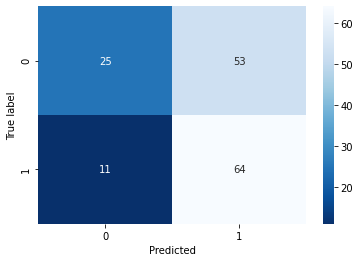

In [173]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

**Промежуточный вывод:**\
Из матрицы ошибок видно, что модель в 53 случаях отнесла невкусное молоко к категории 'вкусно'. По отношению к 64 верноположительным предсказаниям, такое количество ошибок первого рода является критичным, необходимо минимизировать их количество.

6.2 Анализ модели логистической регрессии

Главным критерием в отборе буренок для хозяйства фермер выделил вкус молока, молоко должно быть вкусным. Когда мы будем рекомендовать к приобретению коров, которые дают невкусное молоко, это является ошибками первого рода (False Positive). Они будут критичнее всего при покупке коров.\
В метрике recall задействованы предсказания True Positive и False Negative. Ошибки второго рода некритичны, поскольку, если предложить фермеру коров, у которых предсказывалось невкусное молоко, а в реальности окажется вкусное, ничего страшного не произойдет.\
В метрике precision задействованы предсказания True Positive и False Positive. Количество ошибок первого рода (False Positive) нужно минимизировать, поскольку они критичны. В таком случае можно сказать, что нам нужно максимизировать метрику precision.

Анализ порога принадлежности к классам

In [174]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 4,endpoint=False)]
print(thresholds)

[0.5, 0.62, 0.75, 0.88]


Изменение порога принадлежности к классам

In [175]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_test,y_proba,y_pred_0.5,y_pred_0.62,y_pred_0.75,y_pred_0.88
0,1,0.664116,1,1,0,0
1,1,0.596547,1,0,0,0
2,1,0.725512,1,1,0,0
3,0,0.633882,1,1,0,0
4,1,0.528661,1,0,0,0


In [176]:
print('y_pred_0.5 precision = ', precision_score(y_test, data['y_pred_0.5']))
print('y_pred_0.62 precision = ', precision_score(data['y_test'], data['y_pred_0.62']))
print('y_pred_0.75 precision = ', precision_score(data['y_test'], data['y_pred_0.75']))
print('y_pred_0.88 precision = ', precision_score(data['y_test'], data['y_pred_0.88']))

y_pred_0.5 precision =  0.5470085470085471
y_pred_0.62 precision =  0.5974025974025974
y_pred_0.75 precision =  0.8695652173913043
y_pred_0.88 precision =  1.0


Для того, чтобы свести ошибку первого рода к нулю, необходимо привести метрику precision к 1:

In [177]:
thresholds = [round(i,2) for i in np.linspace(0.75, 0.9,num = 4,endpoint=False)]
print(thresholds)

[0.75, 0.79, 0.82, 0.86]


Пороги принадлежности к классам

In [178]:
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)
data.head()

,y_test,y_proba,y_pred_0.75,y_pred_0.79,y_pred_0.82,y_pred_0.86
0,1,0.664116,0,0,0,0
1,1,0.596547,0,0,0,0
2,1,0.725512,0,0,0,0
3,0,0.633882,0,0,0,0
4,1,0.528661,0,0,0,0


In [179]:
for i in thresholds:
    print(f'y_pred_{i} precision = ', precision_score(data['y_test'], data[f'y_pred_{i}']))

y_pred_0.75 precision =  0.8695652173913043
y_pred_0.79 precision =  1.0
y_pred_0.82 precision =  1.0
y_pred_0.86 precision =  1.0


Рассмотрим порог от 0.75 до 0.79:

In [180]:
thresholds = [0.75, 0.76, 0.77, 0.78, 0.79]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba), columns = ['y_test', 'y_proba'])
columns = []

for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

for i in thresholds:
    print(f'y_pred_{i} precision = ', precision_score(data['y_test'], data[f'y_pred_{i}']))

y_pred_0.75 precision =  0.8695652173913043
y_pred_0.76 precision =  0.85
y_pred_0.77 precision =  0.875
y_pred_0.78 precision =  0.875
y_pred_0.79 precision =  1.0


Таким образом, при пороге 0.79 получаем нулевую ошибку первого рода. Это значит, что модель может присвоить 1 (молоко вкусное), а должно быть 0 (молоко невкусное).

In [181]:
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 1] >= 0.79).astype(int) 
accuracy = accuracy_score(y_test, y_pred_new_threshold)
precision = precision_score(y_test, y_pred_new_threshold)
recall = recall_score(y_test, y_pred_new_threshold)
print('accuracy = ', round(accuracy, 3))
print('precision = ', round(precision, 3))
print('recall = ', round(recall, 3))

accuracy =  0.588
precision =  1.0
recall =  0.16


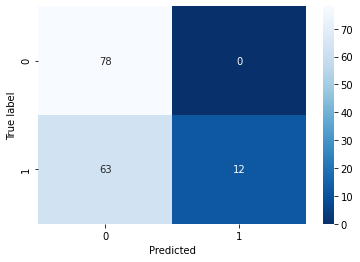

In [182]:
cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

**Промежуточный вывод:**\
Для того, чтобы фермер точно купил коров, которые дают вкусное молоко, необходимо свести ошибку первого рода к нулю, т.е. привести метрику precision к 1.\
Подобрали порог 0.79, при котором получили нулевую ошибку первого рода.
В результате метрика recall снизилась, однако, сейчас фермер точно не купит коров, которые дают невкусное молоко.\
Далее сформируем новую тренировочную выборку, обучим на ней нашу модель с обновленным порогом и получим предсказания для тестовой выборки.

6.3 Спрогнозируем вкус молока коров, которых фермер хочет купить, на основании данных из датасета cow_buy.csv

In [183]:
cow_buy

,порода,тип пастбища,порода папы,имя папы,текущая жирность(%),текущий белок(%),возраст,эке,сырой протеин(г),спо,спо_кат,эке_2,прогноз удоя
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6578.0
1,Айдиал,равнинное,Соверинг,Буйный,3.54,3.081,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6314.0
2,Соверинг,равнинное,Соверинг,Барин,3.59,3.074,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6292.0
3,Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6596.0
4,Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6544.0
5,Соверинг,равнинное,Соверинг,Геркулес,3.63,3.053,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6348.0
6,Айдиал,равнинное,Соверинг,Буйный,3.57,3.079,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6540.0
7,Соверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6370.0
8,Айдиал,холмистое,Соверинг,Соловчик,3.73,3.055,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6350.0
9,Соверинг,равнинное,Соверинг,Геркулес,3.73,3.073,более_2_лет,15.271152,2018.417402,0.95888,1,233.208082,6576.0


In [184]:
X_train_full.head()

,сырой протеин(г),порода,тип пастбища,порода папы,жирность(%),белок(%),возраст,спо_кат,эке_2
0,1984,Айдиал,равнинное,Айдиал,3.72,3.076,более_2_лет,1,198.81
1,1984,Айдиал,равнинное,Айдиал,3.72,3.072,более_2_лет,1,246.49
2,2067,Айдиал,холмистое,Айдиал,3.58,3.080,более_2_лет,1,249.64
3,2091,Айдиал,равнинное,Соверинг,3.72,3.076,более_2_лет,1,243.36
4,1721,Соверинг,равнинное,Соверинг,3.61,3.076,более_2_лет,0,182.25


Приведем в соответствие датафрейм cow_buy

In [185]:
cow_buy.rename(columns={'текущая жирность(%)': 'жирность(%)', 'текущий белок(%)': 'белок(%)'}, inplace=True)
cow_buy = cow_buy.drop(['имя папы', 'эке', 'спо'], axis=1)

Список категориальных признаков:

In [186]:
cat_col_names = ['порода', 'тип пастбища', 'порода папы', 'возраст', 'спо_кат']

Список количественных признаков:

In [187]:
num_col_names = ['жирность(%)', 'белок(%)', 'эке_2', 'сырой протеин(г)']

Кодируем категориальные признаки с помощью OneHotEncoder

In [188]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train_full[cat_col_names])
X_test_ohe = encoder.transform(cow_buy[cat_col_names])
encoder_col_names = encoder.get_feature_names()

Масштабируем количественные признаки с помощью StandardScaler

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full[num_col_names])
X_test_scaled = scaler.transform(cow_buy[num_col_names])

Создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных

In [190]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [191]:
X_train_full = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [192]:
clf.fit(X_train_full, y_train_full)
y_proba = clf.predict_proba(X_test_full)[:, 1]
taste_pred = (y_proba >= 0.79).astype(int)
taste_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

По прогнозу модели все коровы дадут невкусное молоко. Модель неточная, поэтому стоит увеличить вероятность ошибки покупки с невкусным молоком.

In [193]:
taste_pred = (y_proba >= 0.70).astype(int)
taste_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [194]:
cow_buy['прогноз вкуса молока'] = taste_pred
cow_buy['прогноз вкуса молока'] = cow_buy['прогноз вкуса молока'].map({1: 'вкусно', 0: 'не вкусно'}).astype(str)

Просмотрим полученный датафрейм

In [195]:
cow_buy

,порода,тип пастбища,порода папы,жирность(%),белок(%),возраст,сырой протеин(г),спо_кат,эке_2,прогноз удоя,прогноз вкуса молока
0,Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,2018.417402,1,233.208082,6578.0,вкусно
1,Айдиал,равнинное,Соверинг,3.54,3.081,менее_2_лет,2018.417402,1,233.208082,6314.0,не вкусно
2,Соверинг,равнинное,Соверинг,3.59,3.074,более_2_лет,2018.417402,1,233.208082,6292.0,не вкусно
3,Соверинг,холмистое,Айдиал,3.40,3.061,более_2_лет,2018.417402,1,233.208082,6596.0,не вкусно
4,Соверинг,равнинное,Айдиал,3.64,3.074,более_2_лет,2018.417402,1,233.208082,6544.0,не вкусно
5,Соверинг,равнинное,Соверинг,3.63,3.053,менее_2_лет,2018.417402,1,233.208082,6348.0,не вкусно
6,Айдиал,равнинное,Соверинг,3.57,3.079,более_2_лет,2018.417402,1,233.208082,6540.0,не вкусно
7,Соверинг,холмистое,Айдиал,3.40,3.079,менее_2_лет,2018.417402,1,233.208082,6370.0,вкусно
8,Айдиал,холмистое,Соверинг,3.73,3.055,более_2_лет,2018.417402,1,233.208082,6350.0,не вкусно
9,Соверинг,равнинное,Соверинг,3.73,3.073,более_2_лет,2018.417402,1,233.208082,6576.0,не вкусно


Отбор коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко

In [196]:
cow_buy.loc[(cow_buy['прогноз удоя'] > 6000) & (cow_buy['прогноз вкуса молока'] == 'вкусно')]

,порода,тип пастбища,порода папы,жирность(%),белок(%),возраст,сырой протеин(г),спо_кат,эке_2,прогноз удоя,прогноз вкуса молока
0,Айдиал,холмистое,Айдиал,3.58,3.076,более_2_лет,2018.417402,1,233.208082,6578.0,вкусно
7,Соверинг,холмистое,Айдиал,3.40,3.079,менее_2_лет,2018.417402,1,233.208082,6370.0,вкусно
13,Айдиал,холмистое,Соверинг,3.73,3.079,более_2_лет,2018.417402,1,233.208082,6350.0,вкусно


**Промежуточный вывод:**\
Таким образом фермер может купить из стада 3 коровы.\
Данный результат не является абсолютно точным, поскольку был выбран не оптимальный порог классификации равный 0.79, а порог 0.70. Но при таком значении фермер не купил бы ни одной коровы.\
Таким образом, если фермер хочет купить коров полностью соответствующих его запросам с минимальным риском для себя, ему следует рассматривать большее количество коров для покупки или приобрести 3 коровы из представленных 16 с вероятностью ошибки.

**Вывод:**
1. Из матрицы ошибок видно, что модель в 53 случаях отнесла невкусное молоко к категории 'вкусно'. По отношению к 64 верноположительным предсказаниям, такое количество ошибок первого рода является критичным, необходимо минимизировать их количество.
2. Для того, чтобы фермер точно купил коров, которые дают вкусное молоко, привели ошибку первого рода к нулю, т.е. метрика precision равна 1.
Подобрали порог 0.79, при котором получили нулевую ошибку первого рода.
В результате метрика recall снизилась, однако, в таком случае фермер точно не купит коров, которые дают невкусное молоко.\
Сформировали новую тренировочную выборку, обучили на ней модель с обновленным порогом и получили предсказания для тестовой выборки.
3. Исходя из полученных результатов, фермер может купить из стада 3 коровы.\
Данный результат не является абсолютно точным, поскольку был выбран не оптимальный порог классификации равный 0.79, а порог 0.70. Но при таком значении фермер не купил бы ни одной коровы.\
Таким образом, если фермер хочет купить коров полностью соответствующих его запросам с минимальным риском для себя, ему следует рассматривать большее количество коров для покупки или приобрести 3 коровы из представленных 16 с вероятностью ошибки.

## 7. Итоговые выводы

1. Загрузка и изучение данных.\
В датафрейме ferma_main 634 записи, в датафрейме ferma_dad 629 записей, в датафрейме cow_buy 20 записей.\
Пропусков в данных нет.\
Названия столбцов являются некорректными, их необходимо будет привести к нижнему регистру.\
Типы данных в датафреймe ferma_main в столбцах эке (энергетическая кормовая единица), сырой протеин, г, жирность,%, белок,% и в датафрейме cow_buy в столбцах текущая_жирность,%, текущий_уровень_белок,% не соответствуют содержащимся в них данным.
2. Предобработка данных.\
Привели к нижнему регистру названия столбцов, измененили названия где требуется. Удалили 5 явных дубликатов в датафрейме ferma_main, 4 явных дубликата в датафрейме cow_buy, устранили неявные дубликаты. Изменили типы данных в датафрейме ferma_main в столбцах эке, спо, жирность(%), белок(%) и в датафрейме cow_buy в столбцах текущая жирность(%), текущий белок(%) на число с плавающей точкой (float).
3. Исследовательский анализ данных.\
Как показал иссследовательский анализ количественных признаков, почти все признаки распределены нормально. Удалили аномальное значение признака 'удой', равное 45 616 кг. Удалили выбросы в признаке 'белок' на промежутке < 3.069% и > 3.081%. Тем самым улучшили данные. Распределение категориальных признаков нормальное по всем признакам.
4. Корреляционный анализ признаков в датасете.
- Между целевым признаком 'удой(кг)' и входным признаком 'сырой протеин'(г) наблюдается линейная связь.\
Между целевым признаком 'удой(кг)' и входными признаками 'эке', 'спо', 'жирность(%)', 'белок(%)' наблюдается нелинейная связь.\
Слабая корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'белок(%)' - 0,19, 'порода' - 0,16, 'тип пастбища' - 0,29.\
Умеренная корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'сырой протеин(г)' - 0,46, 'спо' - 0,66, 'порода папы' - 0,52.\
Высокая корреляция наблюдается между целевым признаком 'удой(кг)' и входными признаками 'эке' - 0,72, 'жирность(%)' - 0,71, 'возраст' - 1.\
Для категориального признака 'вкус молока' корреляцию не рассчитываем.
- Между целевым и входными признаками есть нелинейные связи. Причиной этого может быть разный масштаб признаков. Дополнительные признаки предлагаю не вводить, а провести масштабирование или трансформирование признаков, при необходимости.
- Как видно из корреляционной матрицы, между некоторыми входными признаками есть умеренная корреляция, но высокой корреляции, обычно указывающей на мультиколлинеарность, не наблюдается.
5. Задача регрессии.
- Значение R2 модели №1 - 0.8034133611669033.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым.
- Значение R2 модели №2 - 0.8332519251903154, что на 3% больше, чем в предыдущей модели.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Для улучшения ситуации можно добавить в модель дополнительные признаки или трансформировать признаки, чтобы изменить взаимосвязь входных признаков с целевым.\
Можно сделать вывод, что модель №2 более точная, т.е. уменьшение нелинейности между входным и целевыми признаками положительно влияет на модель.
- Значение R2 модели №3 - 0.8467677260231983, что еще больше, чем в предыдущих моделях.\
Остатки имеют симметричное нормальное распределение.\
Анализ дисперсии ошибок показал, что она стала более стабильной, чем в предыдущих моделях.\
Можно сделать вывод, что модель №3 оказалась более точной. Уменьшение нелинейности между входным и целевыми признаками и добавление нового входного признака положительно повлияло на модель.
- Коэффициенты детерминации:\
R2 модели №1: 0.8034133611669033\
R2 модели №2: 0.8332519251903154\
R2 модели №3: 0.8467677260231983\
Остатки:\
Модель №1:
Остатки имеют симметричное нормальное распределение. Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Модель №2:
Остатки имеют симметричное нормальное распределение.
Анализ дисперсии выявил непостоянство остатков: чередование низкой и высокой дисперсии остатков. Это говорит о неточности модели.\
Модель №3:
Остатки имеют симметричное нормальное распределение.
Анализ дисперсии ошибок показал, что эта модель более стабильная, чем предыдущие модели.
- Доверительный интервал прогноза лучшей модели - 6069.931182548928, 6212.072396197736.
- Как показывает прогноз удоя коров, которых фермер хочет купить, к покупке можно рекомендовать всех коров, поскольку прогнозируемый удой всех коров более 6000 кг молока в год. 
6. Задача классификации.
- Из матрицы ошибок видно, что модель в 53 случаях отнесла невкусное молоко к категории 'вкусно'. По отношению к 64 верноположительным предсказаниям, такое количество ошибок первого рода является критичным, необходимо минимизировать их количество.
- Для того, чтобы фермер точно купил коров, которые дают вкусное молоко, привели ошибку первого рода к нулю, т.е. метрика precision равна 1.\
Подобрали порог 0.79, при котором получили нулевую ошибку первого рода.
В результате метрика recall снизилась, однако, в таком случае фермер точно не купит коров, которые дают невкусное молоко.\
Сформировали новую тренировочную выборку, обучили на ней модель с обновленным порогом и получили предсказания для тестовой выборки.
- Исходя из полученных результатов, фермер может купить из стада 3 коровы.\
Данный результат не является абсолютно точным, поскольку был выбран не оптимальный порог классификации равный 0.79, а порог 0.70. Но при таком значении фермер не купил бы ни одной коровы.\
Таким образом, если фермер хочет купить коров полностью соответствующих его запросам с минимальным риском для себя, ему следует рассматривать большее количество коров для покупки или приобрести 3 коровы из представленных 16 с вероятностью ошибки.